In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from utils import make_video, process_cams, get_ramdisk_dir

/home/cat/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from datetime import datetime, timezone, timedelta

#############################################
#############################################
#############################################
n_cams = 18
root_dir = "/home/cat/Downloads/data_stitching/cams/"
date = "2025_07_31"                               # date of the video
hour_start = "07"                                     # start at midnight
n_mins = 1440
shrink_factor = 10   # this shrinks the video along x and y axis by this factor; for now we use subsampling
frame_subsample = 4
cage_id = 1
cam_ids = np.arange(1, n_cams + 1)

#
skip_regeneration = False  # if True, delete old bin files before making new ones
parallel_flag = True
n_cores = 4
delete_bins_flag = True
build_video_only = False

# first make ramdisk dir
ram_disk_dir = get_ramdisk_dir()


# outer loop gooin over every minue of time 
for minute in range(n_mins):

    # this is to run full days
    if False:
        hour_start = str(minute // 60).zfill(2)
        minute = minute % 60

    # this is for debugging
    else:
        pass

    # save the combined frame as a video file
    fname_combined = os.path.join(root_dir,
                                  "hour_" + hour_start+
                                  "_minute_" +str(minute)+'.avi')

    #
    if os.path.exists(fname_combined):
        print ("Video exists for Minute ", str(minute), "...skipping...")
        continue

    #
    if build_video_only==False:
        process_cams(cam_ids,
                     n_cores,
                    root_dir,
                    ram_disk_dir,
                    cage_id,
                    date,
                    hour_start,
                    minute,
                    parallel_flag=parallel_flag,
                    shrink_factor=shrink_factor,
                    skip_regeneration=False)

    #################################################
    ############### Make video ######################
    #################################################
    # process #2 - here we make the mosaic 1 minute video based on the available files
    # we loop over all possible files 
    overwrite_existing = False
    make_video(root_dir,
               ram_disk_dir,
               date,
               minute,
               hour_start,
               n_cams,
               fname_combined,
               shrink_factor=shrink_factor,
               frame_subsample=frame_subsample,
               overwrite_existing=overwrite_existing,
               delete_bins_flag = delete_bins_flag)
    
    #print ("***************************")
    print ('')

    #break

    

Video exists for Minute  0 ...skipping...
Video exists for Minute  1 ...skipping...
Video exists for Minute  2 ...skipping...
Video exists for Minute  3 ...skipping...
Video exists for Minute  4 ...skipping...
Video exists for Minute  5 ...skipping...
Video exists for Minute  6 ...skipping...
Video exists for Minute  7 ...skipping...


  0%|          | 0/18 [00:00<?, ?it/s]

 22%|██▏       | 4/18 [00:24<01:24,  6.00s/it]

 33%|███▎      | 6/18 [00:54<01:57,  9.75s/it]

 44%|████▍     | 8/18 [00:56<01:04,  6.49s/it]

 78%|███████▊  | 14/18 [01:24<00:21,  5.37s/it]

 89%|████████▉ | 16/18 [01:38<00:11,  5.74s/it]

100%|██████████| 18/18 [01:47<00:00,  5.96s/it]


Final video size: 6630 x 2160


100%|██████████| 1500/1500 [00:01<00:00, 754.97it/s]


  0%|          | 0/18 [00:00<?, ?it/s]

 11%|█         | 2/18 [00:28<03:44, 14.01s/it]

 56%|█████▌    | 10/18 [00:58<00:42,  5.28s/it]

 67%|██████▋   | 12/18 [01:26<00:43,  7.31s/it]

100%|██████████| 18/18 [01:47<00:00,  5.97s/it]


Final video size: 6630 x 2160


100%|██████████| 1500/1500 [00:02<00:00, 645.57it/s]


  0%|          | 0/18 [00:00<?, ?it/s]

 33%|███▎      | 6/18 [00:30<01:00,  5.00s/it]

In [15]:
import numpy as np

rows = np.array([
    [16, 13, 10, 7, 4, 1],
    [17, 14, 11, 8, 5, 2],
    [18, 15, 12, 9, 6, 3]
])

cam = 1

result = np.where(rows == cam)
print("result:", result)

if result[0].size > 0:
    row_index = result[0][0]
    col_index = result[1][0]
    print("row:", row_index, "col:", col_index)
else:
    print("Not found")



result: (array([0]), array([5]))
row: 0 col: 5


In [ ]:
# 
import yaml

n_cams = 18
root_dir = "/home/cat/Downloads/data_stitching/cams/"
date = "2025_07_31"                               # date of the video
hour_start = "07"                                     # start at midnight
n_mins = 60
shrink_factor = 10   # this shrinks the video along x and y axis by this factor; for now we use subsampling
cage_id = 1
cam_ids = np.arange(1, n_cams + 1)

#
skip_regeneration = True  # if True, delete old bin files before making new ones
parallel_flag = False
delete_bins = False
build_video_only = True


fname = "camera_layout.yaml"
cam_coordinates = yaml.safe_load(open(fname, 'r'))
print ("cam_coordinate: ", cam_coordinates)

rows = [
        [16,13,10,7,4,1],
        [17,14,11,8,5,2],
        [18,15,12,9,6,3]
]

rows = np.array(rows)

# load translation table
fname = os.path.join(root_dir, "translation_table.yaml")
translations = yaml.safe_load(open(fname, 'r'))

################################################################
# ok so need to accumulate the x - row-wise translations
trans_cum_x_array = []
for cam in range(1,n_cams+1,1):
    trans = translations['cam'+str(cam)]
   # print (trans)

    # find the row of the camera
    for ctr, row in enumerate(rows):
        idx = np.where(row==cam)[0]
        #print ("row: ", row, "cam: ", cam)
        if idx.shape[0]!=0:
            #print ("found row: ", ctr, ", and column: ", idx)
            # now need to sum all the x translations from all the cameras to the left
            temp_x = 0
            for i in range(idx[0]+1):
                temp_cam = translations['cam'+str(row[i])]
                #print ('cam'+str(row[i]) + ", adding shift: ", temp_cam)
                temp_x+= temp_cam[0]
            print ("total shift for cam: ", cam, "is ", temp_x)
            #print (cam_coordinates['cam'+str(row[i])])
            temp_x+=cam_coordinates['cam'+str(row[i])][0]
            print ("final location cam: ", cam, "is ", temp_x)

    # 
    trans_cum_x_array.append(temp_x)


    


cam_coordinate:  {'cam1': [6400, 0], 'cam2': [6400, 720], 'cam3': [6400, 1440], 'cam4': [5120, 0], 'cam5': [5120, 720], 'cam6': [5120, 1440], 'cam7': [3840, 0], 'cam8': [3840, 720], 'cam9': [3840, 1440], 'cam10': [2560, 0], 'cam11': [2560, 720], 'cam12': [2560, 1440], 'cam13': [1280, 0], 'cam14': [1280, 720], 'cam15': [1280, 1440], 'cam16': [0, 0], 'cam17': [0, 720], 'cam18': [0, 1440]}
total shift for cam:  1 is  -330
final location cam:  1 is  6070
total shift for cam:  2 is  -330
final location cam:  2 is  6070
total shift for cam:  3 is  -330
final location cam:  3 is  6070
total shift for cam:  4 is  -150
final location cam:  4 is  4970
total shift for cam:  5 is  -150
final location cam:  5 is  4970
total shift for cam:  6 is  -150
final location cam:  6 is  4970
total shift for cam:  7 is  0
final location cam:  7 is  3840
total shift for cam:  8 is  0
final location cam:  8 is  3840
total shift for cam:  9 is  0
final location cam:  9 is  3840
total shift for cam:  10 is  0
fin

Data shape: (222163200,)
data :  (2400, 152, 203, 3)


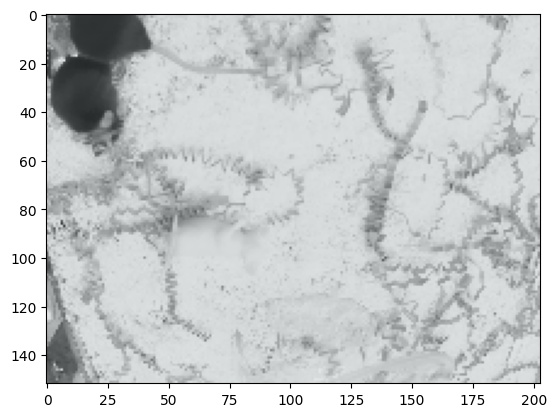

In [64]:


#
fname = '/home/cat/ramdisk/ramdisk/9_shrink_10_hour_16_minute_16_clean.bin'
fname = '/home/cat/ramdisk/ramdisk/10_shrink_10_hour_16_minute_16_clean.bin'

# load raw data
data = np.fromfile(fname, dtype=np.uint8)

# let's check the shape of the data
print("Data shape:", data.shape)

# ok it should have shape of 152, 202, 3, n_frames
try:
    data = data.reshape(-1, 152, 203, 3)
    print ("data : ", data.shape)
except:
    print("Failed to reshape data")


# start frame; let's advance 2000 frames in
frame_idx = 1500

# also add a small offset to the data in bytes
frame = data[frame_idx]
#
plt.imshow(frame)
plt.show()



In [ ]:
fname_npz = '/home/cat/Downloads/3D_Vids_to_be_stiched/9_12/9/2025_09_26/3_9_2025_09_26_16_16_01_480_metadata.npz'

data = np.load(fname_npz)
print (data.files)
# ['cage_id', 'rpi_id', 'frame_times', 'frames_encoded', 'recording_start', 'recording_end', 'encoder_start', 'frame_rate', 'recording_duration', 'recording_mode', 'recording_type', 'recording_duration_continuous', 'recording_duration_triggered', 'recording_start_time']

# load all parameters
cage_id = data['cage_id']
rpi_id = data['rpi_id']
frame_times = data['frame_times']
frames_encoded = data['frames_encoded']
recording_start = data['recording_start']
recording_end = data['recording_end']
encoder_start = data['encoder_start']
frame_rate = data['frame_rate']
recording_duration = data['recording_duration']
recording_mode = data['recording_mode']
recording_type = data['recording_type']
recording_duration_continuous = data['recording_duration_continuous']
recording_duration_triggered = data['recording_duration_triggered']
recording_start_time = data['recording_start_time']

# print all parameters
print ("cage_id: ", cage_id)
print ("rpi_id: ", rpi_id)
print ("frame_times: ", frame_times)
print ("frames_encoded: ", frames_encoded)
print ("recording_start: ", recording_start)
print ("recording_end: ", recording_end)
print ("encoder_start: ", encoder_start)
print ("frame_rate: ", frame_rate)
print ("recording_duration: ", recording_duration)
print ("recording_mode: ", recording_mode)
print ("recording_type: ", recording_type)
print ("recording_duration_continuous: ", recording_duration_continuous)

# ['cage_id', 'rpi_id', 'frame_times', 'frames_encoded', 'recording_start', 'recording_end', 'encoder_start', 'frame_rate', 'recording_duration', 'recording_mode', 'recording_type', 'recording_duration_continuous', 'recording_duration_triggered', 'recording_start_time']
# cage_id:  3
# rpi_id:  9
# frame_times:  [1758899761428189 1758899761453182 1758899761478176 ... 1758899821412437
#  1758899821437431 1758899821462426]
# frames_encoded:  [2402]
# recording_start:  1758899761.4825447
# recording_end:  1758899821.5302155
# encoder_start:  1758899761.4810889
# frame_rate:  40.001551539801845
# recording_duration:  60
# recording_mode:  continuous
# recording_type:  continuous
# recording_duration_continuous:  60

# let's also compute the offset in universal time
# this video starts at 2025-09-26 16:16:01.4825447
# so we need to convert this to unix time
year = 2025
month = 9
day = 26
hour = 16
minute = 16

# convert this to unix time
import datetime
import calendar

# Create a datetime object (with microseconds from the recording_start)
dt = datetime.datetime(year, month, day, hour, minute, 0, 0)

# Convert datetime to UNIX timestamp in seconds, then to nanoseconds
unix_timestamp_microsec = int(dt.timestamp() * 1e6) + (dt.microsecond % 1_000_000) * 1000

print("Datetime object:", dt)
print("UNIX timestamp (microsec):", unix_timestamp_microsec)

# let's subtract this from the frame times
frame_times_unix = frame_times - unix_timestamp_microsec
print ("frame_times_unix from start of minute: ", frame_times_unix)

# also convert to seconds
frame_times_unix_sec = frame_times_unix / 1e6
print ("frame_times_unix_sec from start of minute: ", frame_times_unix_sec)


# compute inter frame intervals
diff = np.diff(frame_times_unix_sec)
print ("inter frame intervals: ", diff)

# compute the mean inter frame interval
mean_inter_frame_interval = np.mean(diff)
print ("mean inter frame interval: ", mean_inter_frame_interval)

# make a histogram of the inter frame intervals
plt.hist(diff, bins=100)
plt.show()


















NameError: name 'np' is not defined

In [28]:
import numpy as np

fname = "/home/cat/Downloads/Cage 4.0.001 Staging/1/2025_11_20/3_1_2025_11_20_18_56_04_603_metadata.npz"

data = np.load(fname)
print (data.files)

# load all parameters
# ['cage_id', 'rpi_id', 'frame_times', 'frames_encoded', 'recording_start', 'recording_end', 'encoder_start', 'frame_rate', 'recording_duration', 'recording_mode', 'recording_type', 'recording_duration_continuous', 'recording_duration_triggered', 'recording_start_time']

cage_id = data['cage_id']
rpi_id = data['rpi_id']
frame_times = data['frame_times']
frames_encoded = data['frames_encoded']
recording_start = data['recording_start']
recording_end = data['recording_end']
encoder_start = data['encoder_start']
frame_rate = data['frame_rate']
recording_duration = data['recording_duration']
recording_mode = data['recording_mode']
recording_type = data['recording_type']
recording_duration_continuous = data['recording_duration_continuous']
recording_duration_triggered = data['recording_duration_triggered']
recording_start_time = data['recording_start_time']

print (cage_id)
print (rpi_id)
print (frame_times)
print (frames_encoded)
print (recording_start)
print (recording_end)
print (encoder_start)
print (frame_rate)
print (recording_duration)
print (recording_mode)
print (recording_type)
print (recording_duration_continuous)
print (recording_duration_triggered)
print (recording_start_time)


['cage_id', 'rpi_id', 'frame_times', 'frames_encoded', 'recording_start', 'recording_end', 'encoder_start', 'frame_rate', 'recording_duration', 'recording_mode', 'recording_type', 'recording_duration_continuous', 'recording_duration_triggered', 'recording_start_time']
3
1
[1763664964566973 1763664964591968 1763664964616961 ... 1763665024529311
 1763665024554306 1763665024579300]
[2401]
1763664964.604615
1763665024.665796
1763664964.6037517
39.97590385818141
60
continuous
continuous
60
5
3_1_2025_11_20_18_56_04_603


In [44]:
import datetime

# convert the frame_tiems.npy from universal to date-time
times_normal = np.array(frame_times)/1e6
print ("frame times: ", times_normal)

import datetime
times_normal_dt = np.array([datetime.datetime.fromtimestamp(t) for t in times_normal])

print (" times: ", times_normal_dt)

temp = datetime.datetime.fromtimestamp(times_normal[0])

# convert temp to normalt time
print (temp)

temp2 = 1763661360000
temp2 = datetime.datetime.fromtimestamp(temp2/1e3)
print (temp2)



from datetime import datetime, timezone, timedelta

date = "2025_11_20"
hour_start = 18
minute = 56
verbose = True
print("date:", date, "hour_start:", hour_start, "minute:", minute)


dt_naive = datetime.strptime(
    f"{date.replace('_', '-')} {hour_start}:{minute:02d}",
    "%Y-%m-%d %H:%M"
)

dt_utc1 = dt_naive.replace(tzinfo=timezone(timedelta(hours=1)))  # UTC+1

timestamp_ns = int(dt_utc1.timestamp() * 1_000_000_000)

unix_time_to_start_of_minute = timestamp_ns // 1_000_000

if verbose:
    print("absolute unix time (ms, UTC+1) to start of minute:", unix_time_to_start_of_minute)

    # convert this to naive time
    dt_naive = dt_utc1.astimezone(timezone.utc).replace(tzinfo=None)
    print("naive time:", dt_naive)



frame times:  [1.76366496e+09 1.76366496e+09 1.76366496e+09 ... 1.76366502e+09
 1.76366502e+09 1.76366502e+09]
 times:  [datetime.datetime(2025, 11, 20, 18, 56, 4, 566973)
 datetime.datetime(2025, 11, 20, 18, 56, 4, 591968)
 datetime.datetime(2025, 11, 20, 18, 56, 4, 616961) ...
 datetime.datetime(2025, 11, 20, 18, 57, 4, 529311)
 datetime.datetime(2025, 11, 20, 18, 57, 4, 554306)
 datetime.datetime(2025, 11, 20, 18, 57, 4, 579300)]
2025-11-20 18:56:04.566973
2025-11-20 17:56:00
date: 2025_11_20 hour_start: 18 minute: 56
absolute unix time (ms, UTC+1) to start of minute: 1763661360000
naive time: 2025-11-20 17:56:00


In [ ]:
fname = '/home/cat/Downloads/data_stitching/1/minute_1.bin'

# let's load this using mmap as a binary file
data = np.memmap(fname, dtype=np.uint8, mode='r', shape=(6000, 720, 1280, 3))

# let's check the shape of the data
print("Data shape:", data.shape)

# ok now let's grab a frame and display it
idx = 2000
frame = data[idx]

# let's display the frame using opencv
cv2.imshow("Frame", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


Data shape: (6000, 720, 1280, 3)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/cat/miniconda3/lib/python3.11/site-packages/cv2/qt/plugins"


In [ ]:
# Ignore - past here

In [110]:
fname0 = '/home/cat/Downloads/data_stitching/cams/2/1_2_2025_07_31_07_00_41_557_metadata.npz'
fname2 = '/home/cat/Downloads/data_stitching/cams/2/1_2_2025_07_31_07_01_44_905_metadata.npz'

frame_times1 = np.load(fname1)['frame_times']
frame_times2 = np.load(fname2)['frame_times']
print ((frame_times1 - 1753941704894859)//1000+49880, "msecs")
print ((frame_times2 - 1753941704894859)//1000+49880-60000, "msecs")


[ 49880  49888  49896 ... 109864 109872 109881] msecs
[-10120 -10112 -10104 ...  49864  49872  49881] msecs


In [109]:
fname_bin1 = '/home/cat/Downloads/data_stitching/cams/2/minute_1.bin'
data_bin1 = np.fromfile(fname_bin1).reshape(32,18,3)
# print size of file
print (data_bin1.size/32/18)

print (data_bin1.shape)

ValueError: cannot reshape array of size 897480 into shape (32,18,3)

In [ ]:


#########################################
# LOAD video time stamps
data = np.load(fnames_cam1[0], allow_pickle=True)
print (data.files)
frame_times_ms = data['frame_times']//1000
print (frame_times_ms)
recording_start_time = data['recording_start_time']
print ("recording start time: ", recording_start_time)
encoder_start = data['encoder_start']
print ("encoder start: ", encoder_start)

###############################################
# convert july 24, 2025  exacdtly midngith to milisecond in epoch systm eimte clock but make sure its' UTC+1 london time
epoch_start = np.datetime64('2025-07-24T00:00:00', 'ms') - np.timedelta64(1, 'h')  # UTC+1
epoch_start_ms = epoch_start.astype('datetime64[ms]').astype(int)

# so this is the video time stamps relative to the epoch start
delta_times = frame_times_ms - epoch_start_ms
print("time srelative to midnight (in ms): ", delta_times)

# now convert into bucket discrete time
delta_times_bucket = delta_times // 10 * 10 # convert to seconds
print("time relative to midnight in 10ms buckets: ", delta_times_bucket)

# and convert into a discrete bin of 10ms from midnight
delta_times_bucket_discrete = delta_times_bucket // 10
print("time relative to midnight in 10ms discrete buckets: ", delta_times_bucket_discrete)
print ('')
print (' So we either ruse this bueckt version which tells you which 10ms bucket the frame is in')
print (' or the disrete version which tells you exactly what frame of the video to put the uncompressed video data into')

In [51]:
#####################################
# make some fake video data but don't generate the full array as it will take 100GB of ram
data_cam1_vid1 = np.zeros((frame_times_ms.shape[0]))
print ("video data (ordinarlily this would be an .mp4 that's decompressed on the fly: ", data_cam1_vid1.shape)

# and we crate a 1 min video bucket to hold the videos
stitched_video = np.zeros((18, 60000))
print ("stitched video (18 rpis, 60000 times should be about 10minutes (100fps * 60 * 10)): ", stitched_video.shape)
print (" (the full video is much larger as it has the frames 1024 , 768 and 3 channels for RGB)")

# so now we can loop over the relative to midnight time dicscrete buickets
for i in range(delta_times_bucket_discrete.shape[0]):
    bucket = delta_times_bucket_discrete[i]
    if i%1000==0:
        print("processing frame ", i, " in bucket ", bucket)
    
    # so now we can put the video data into the stitched video
    # this is just a fake example, in reality you would decompress the video and put it into the stitched video
    stitched_video[0, bucket] = data_cam1_vid1[i]  # assuming we are putting cam1 data into the first row


video data (ordinarlily this would be an .mp4 that's decompressed on the fly:  (7205,)
stitched video (18 rpis, 60000 times should be about 10minutes (100fps * 60 * 10)):  (18, 60000)
 (the full video is much larger as it has the frames 1024 , 768 and 3 channels for RGB)
processing frame  0  in bucket  7589
processing frame  1000  in bucket  8422
processing frame  2000  in bucket  9255
processing frame  3000  in bucket  10088
processing frame  4000  in bucket  10921
processing frame  5000  in bucket  11754
processing frame  6000  in bucket  12587
processing frame  7000  in bucket  13420


In [19]:
print("Files:", data.files)
print("First 5 frame_times_ms:", frame_times_ms[:5])
print("Recording start time:", recording_start_time)
print("Encoder start:", encoder_start)
print("Midnight reference:", epoch_start_ms)
print("First timestamp:", frame_times_ms[0])
print("Delta (first):", delta_times[0])


Files: ['frame_times', 'frames_encoded', 'recording_start', 'recording_end', 'encoder_start', 'frame_rate', 'recording_duration', 'recording_mode', 'recording_type', 'recording_duration_continuous', 'recording_duration_triggered', 'recording_start_time']
First 5 frame_times_ms: [1753311675898 1753311675906 1753311675914 1753311675923 1753311675931]
Recording start time: 2025-07-24_00-01-15
Encoder start: 1753311675.907574
Midnight reference: 1753315200000
First timestamp: 1753311675898
Delta (first): -3524102


In [20]:
print("Recording start time (converted):", 
      np.datetime64(int(recording_start_time), 'ms'))


ValueError: invalid literal for int() with base 10: '2025-07-24_00-01-15'